## Ajustement d'une Fonction Exponentielle

### Formule de la Régression Linéaire

La formule de la régression linéaire peut être traduite en une formule de régression exponentielle :

Y = b * a^X

- **Formule de base** : 
  Y = aX + b

- **Formule exponentielle** : 
  ln(Y) = ln(b) + X * ln(a)

### Exemple

Dans cet exemple, la population de bactéries croît en fonction du temps :

- **x** : heure
- **y** : population de bactéries

### Covariance

Nous pouvons afficher la covariance des deux variables en utilisant la commande suivante :
```python
data[['x', 'y']].cov()

## On affiche le nuage de points correspondant:


## On affiche le nuage de points correspondant

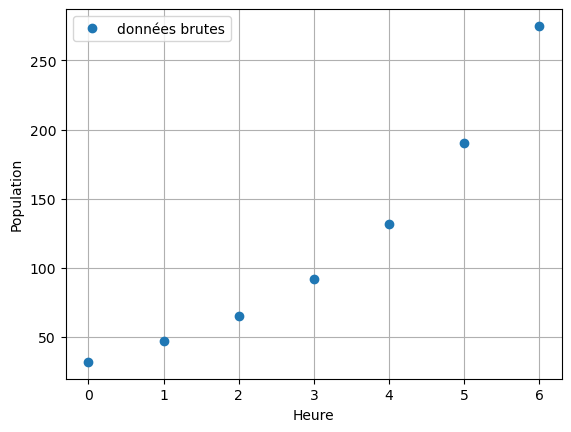

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data = pd.read_csv('Bacterie.csv', sep=';')

plt.plot(data['Heure'], data['population'], 'o', label='données brutes')
plt.xlabel('Heure')
plt.ylabel('Population')
plt.grid()
plt.legend()
plt.show()

In [2]:
data[['Heure','population']].cov()

,Heure,population
Heure,4.666667,180.333333
population,180.333333,7657.333333


## Pour calculer notre modele on a besoin de traduire les variables pour que celle-ci soient linéaire.

#### Calcul du logarithme népérien de Y
De cette manière, on peut calculer la covariance et la variance des variables.


In [ ]:
# Calcul du logarithme népérien de Y
data['lnY'] = np.log(data['population'])

#### Grâce à la transformation de Y on peut calculer la covariance de manière classique. 
#### Après avoir calculé la covariance on récupère la variance de x pour calculer la pente a. 

In [ ]:
# Calcul de la covariance et de la variance
cov_x_y = data[['Heure', 'lnY']].cov().iloc[0, 1]
var_x = data['Heure'].var()

a = cov_x_y / var_x

## Calcul de la constante b
#### On sait que ln(b) = moyenne(ln(Y)) - a * moyenne(X)

In [ ]:
# Calcul des coefficients a et ln(b)
moy_lnY = data['lnY'].mean()
moy_x = data['Heure'].mean()
ln_b = moy_lnY - a * moy_x

# Création d'un Modèle Linéaire et Visualisation des Données

## 1. Création de la Colonne pour le Modèle Linéaire

Nous commençons par créer une nouvelle colonne dans notre jeu de données appelée **Traduction Modele lineaire**. Cette colonne représente les valeurs prédites par notre modèle linéaire. La formule utilisée est la suivante :

## 2. Calcul de la Population Prédite

Ensuite, nous calculons la **Population Prédite** en utilisant la fonction exponentielle. Cela nous permet de revenir à l'échelle originale des données (population). La formule est :

- **Population Prédite** = exp(Traduction Modele lineaire)

  - **exp()** représente la fonction exponentielle.

## 3. Visualisation des Résultats

Pour mieux comprendre nos résultats, nous visualisons les données. Nous utilisons un graphique pour comparer la **Population Observée** et la **Population Prédite** :

- Les points bleus représentent les données observées de la population.
- La ligne rouge représente notre modèle ajusté (population prédite).


In [ ]:
# Créer la colonne pour le modèle linéaire
data['Traduction Modele lineaire'] = a * data['Heure'] + ln_b

# Calculer la population prédite
data['Population Prédite'] = np.exp(data['Traduction Modele lineaire'])

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(data['Heure'], data['population'], color='blue', label='Données observées (Population)', s=100)
plt.plot(data['Heure'], data['Population Prédite'], color='red', label='Modèle ajusté (Population prédite)', linewidth=2)
plt.xlabel('Heure')
plt.ylabel('Population')
plt.title('Comparaison entre la Population Observée et le Modèle Ajusté')
plt.legend()
plt.grid()
plt.show()

# Analyse des Résidus pour Évaluer la Cohérence du Modèle

## 1. Calcul de la Population Prédite

Nous commençons par calculer la **Population Prédite** en utilisant la colonne **Traduction Modele lineaire** que nous avons créée précédemment. Pour obtenir la population prédite, nous appliquons la fonction exponentielle :

- **Population Prédite** = exp(Traduction Modele lineaire)

Cela nous permet de revenir à l'échelle originale de notre variable dépendante.

## 2. Calcul des Résidus

Les **Résidus** représentent la différence entre les valeurs observées de la population et les valeurs prédites par notre modèle. Ils sont calculés comme suit :

- **Résidus** = Population Observée - Population Prédite

Cette étape nous aide à comprendre à quel point notre modèle s'écarte des données réelles.

## 3. Visualisation des Résidus

Pour analyser les résidus, nous visualisons les données à l'aide d'un graphique. Nous traçons les résidus en fonction de la population prédite :

- Les points violets représentent les résidus.
- Une ligne rouge est ajoutée à y=0 pour montrer où les résidus seraient nuls.

In [ ]:
# Calculer la population prédite
data['Population Prédite'] = np.exp(data['Traduction Modele lineaire'])

# Calcul des résidus
data['Résidus'] = data['population'] - data['Population Prédite']

# Visualisation : Résidus vs Population Prédite
plt.figure(figsize=(10, 6))
plt.scatter(data['Population Prédite'], data['Résidus'], color='purple', label='Résidus')
plt.axhline(0, color='red', linestyle='-')  # Ligne horizontale à y=0
plt.xlabel('Population Prédite')
plt.ylabel('Résidus')
plt.title('Analyse des Résidus vs Population Prédite')
plt.grid()
plt.legend()
plt.show()